### Summary:
##### Xgboost is used to predict the employee churn. Hyperparameter optimization is done using 3-fold cross-validation using RandomizedSearchCV.  According to the importances, OverTime is the feature contributing the most to churn, followed by MonthlyIncome, Age, StockOptionLevel and EnvironmentSatisfaction

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
#
import scipy.stats as st
from sklearn.grid_search import RandomizedSearchCV

In [93]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [94]:
drop_list = ['EmployeeCount', 'StandardHours'] # these cols have 0 standard deviation
df.drop(drop_list, axis=1, inplace=True)

In [95]:
final  = [pd.get_dummies(df['Attrition'], prefix='Attrition', drop_first=True)]
df.drop('Attrition', axis=1, inplace=True)
for col in df.columns:
    if df[col].dtype == 'object':
        final.append(pd.get_dummies(df[col], prefix=col))
    else:
        final.append(df[col])
target = pd.concat(final, axis=1)

In [96]:
one_to_left = st.beta(10, 1)  # beta distribution
from_zero_positive = st.expon(0, 50) # exponential distribution

params = {  
    "n_estimators": st.randint(10, 500),
    "max_depth": st.randint(3, 20),
    "learning_rate": st.uniform(0.01, 0.3),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    'reg_lambda': from_zero_positive,
    "min_child_weight": from_zero_positive,
    "max_delta_step": st.randint(1, 10),
}

In [97]:
train, test = train_test_split(target)
y_train = train['Attrition_Yes']
X_train = train.drop('Attrition_Yes', axis=1)

y_test = test['Attrition_Yes']
X_test = test.drop('Attrition_Yes', axis=1)

In [ ]:
xgb_model = XGBClassifier(n_jobs=-1)
n_iter_search = 100
clf = RandomizedSearchCV(xgb_model, params, n_iter=n_iter_search, verbose=0)  
clf.fit(X_train, y_train)  

In [99]:
y_pred = clf.predict(X_test)
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred) * 100.0))

Accuracy: 87.77%


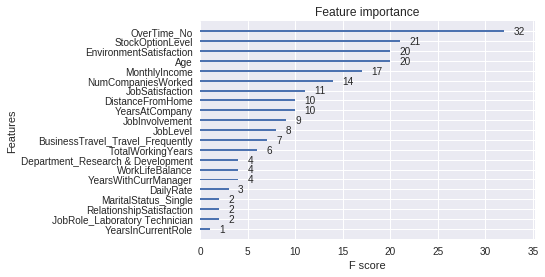

In [101]:
from xgboost import plot_importance
%matplotlib inline
plot_importance(clf.best_estimator_, max_num_features=30)